# Apresentação:

O **capítulo 4** do livro do **Montgomery** trata da checagem de adequação domodelo de **regressão linear normal**. Para a utilização adequada do **modelo de regressão linear normal**, precisamos ter alguns pressupostos.


1. A relação entre a resposta e os regressores é linear, pelo menos aproximadamente. (Já vimos que a multicolinearidade nunca é zero de fato).

2. Os termos de $erro$ $\epsilon$ possuem *média* $0$.

3. Os termos de $erro$ $\epsilon$ possuem *variância* **constante** $\sigma^2$

4. Os $erros$ são **não correlacionados**

5. Os $erros$ são $normalmente$ distribuido.

# Questão1:

Considere o modelo de **regressão simples** adequado à *National Football League*
dados de desempenho da equipe no Problema 2.1

In [1]:
# Equipes:
Equipes <- c("Washington", "Minnesota", "New England", "Oakland", "Pittsburgh",
           "Baltimore", "Los Angeles", "Dallas", "Atlanta", "Buffalo", "Chicago",
           "Cincinnati", "Cleveland", "Denver", "Detroit", "Green Bay", "Houston", "Kansas City",
           "Miami", "New Orleans", "New York Giants", "New York Jets", "Philadelphia", "St. Louis",
           "San Diego", "San Francisco", "Seattle", "Tampa Bay")

# Partidas vencidas:
y <- c(10, 11, 11, 13, 10, 11, 10, 11, 4, 2, 7, 10,
       9, 9, 6, 5, 5, 5, 6, 4, 3, 3, 4, 10, 6, 8, 2, 0)

# Jardas ganhas em corridas (temporada)
x1 <- c(2113, 2003, 2957, 2285, 2971, 2309, 2528, 2147, 1689, 2566, 2363, 2109,
        2295, 1932, 2213, 1722, 1498, 1873, 2118, 1775, 1904, 1929, 2080, 2301,
        2040, 2447, 1416, 1503)

# Jardas ganhas em passes (temporada)
x2 <- c(1985, 2855, 1737, 2905, 1666, 2927, 2341, 2737, 1414, 1838, 1480, 2191,
        2229, 2204, 2140, 1730, 2072, 2929, 2268, 1983, 1792, 1606, 1492, 2835,
        2416, 1638, 2649, 1503)

# Média de punt (jardas/punt)
x3 <- c(38.9, 38.8, 40.1, 41.6, 39.2, 39.7, 38.1, 37.0, 42.1, 42.3, 37.3, 39.5,
        37.4, 35.1, 38.8, 36.6, 35.3, 41.1, 38.2, 39.3, 39.7, 39.7, 35.5, 35.3,
        38.7, 39.9, 37.4, 39.3)

# Percentual de acerto de field goal (field goals convertidos/field goals tentados)
x4 <- c(64.7, 61.3, 60.0, 45.3, 53.8, 74.1, 65.4, 78.3, 47.6, 54.2, 48.0, 51.9,
        53.6, 71.4, 58.3, 52.6, 59.3, 55.3, 69.6, 78.3, 38.1, 68.8, 68.8, 74.1,
        50.0, 57.1, 56.3, 47.0)

# Diferencial de turnovers (turnovers adquiridos - turnovers perdidos)
x5 <- c(+4, +3, +14, -4, +15, +8, +12, -1, -3, -1, +19, +6, -5, +3, +6, -19,
        -5, +10, +6, +7, -9, -21, -8, +2, 0, -8, -22, -9)

# Jardas de penalidade (temporada)
x6 <- c(868, 615, 914, 957, 836, 786, 754, 761, 714, 797, 984, 700, 1037, 986,
        819, 791, 776, 789, 582, 901, 734, 627, 722, 683, 576, 848, 684, 875)

# Percentual de corridas (jogadas de corrida/jogadas totais)
x7 <- c(59.7, 55.0, 65.6, 61.4, 66.1, 61.0, 66.1, 58.0, 57.0, 58.9, 67.5, 57.2,
        58.8, 58.6, 59.2, 54.4, 49.6, 54.3, 58.7, 51.7, 61.9, 52.7, 57.8, 59.7,
        54.9, 65.3, 43.8, 53.5)

# Jardas ganhas em corridas pelos adversários (temporada)
x8 <- c(2205, 2096, 1847, 1903, 1457, 1848, 1564, 1821, 2577, 2476, 1984, 1917,
        1761, 1709, 1901, 2288, 2072, 2861, 2411, 2289, 2203, 2592, 2053, 1979,
        2048, 1786, 2876, 2560)

# Jardas ganhas em passes pelos adversários (temporada)
x9 <- c(1917, 1575, 2175, 2476, 1866, 2339, 2092, 1909, 2001, 2254, 2217, 1758,
        2032, 2025, 1686, 1835, 1914, 2496, 2670, 2202, 1988, 2324, 2550, 2110,
        2628, 1776, 2524, 2241)

In [2]:
# Construção do DataFrame:
tableb1 = data.frame(Equipes,y,x1,x2,x3,x4,x5,x6,x7,x8,x9);tableb1

Equipes,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Washington,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
Minnesota,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
New England,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
Oakland,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
Pittsburgh,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
Baltimore,11,2309,2927,39.7,74.1,8,786,61.0,1848,2339
Los Angeles,10,2528,2341,38.1,65.4,12,754,66.1,1564,2092
Dallas,11,2147,2737,37.0,78.3,-1,761,58.0,1821,1909
Atlanta,4,1689,1414,42.1,47.6,-3,714,57.0,2577,2001


**a.** Construa um gráfico de probabilidade normal dos resíduos. Parece que
haver algum problema com a suposição de normalidade?

In [3]:
# Modelo do Problema 2.1:
modelo <- lm(y ~ x8);summary(modelo)


Call:
lm(formula = y ~ x8)

Residuals:
   Min     1Q Median     3Q    Max 
-3.804 -1.591 -0.647  2.032  4.580 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.788251   2.696233   8.081 1.46e-08 ***
x8          -0.007025   0.001260  -5.577 7.38e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.393 on 26 degrees of freedom
Multiple R-squared:  0.5447,	Adjusted R-squared:  0.5272 
F-statistic:  31.1 on 1 and 26 DF,  p-value: 7.381e-06


    Para construir o gráfico de probabilidade normal, trabalhamos com
    o comando qqnorm. "qq" significa "quantil-quantil". Um gráfico de
    quantil-quantil, ou gráfico Q-Q, compara os quantis de uma
    distribuição de dados com os quantis de uma distribuição teórica
    (normal, no caso de um gráfico de probabilidade normal).

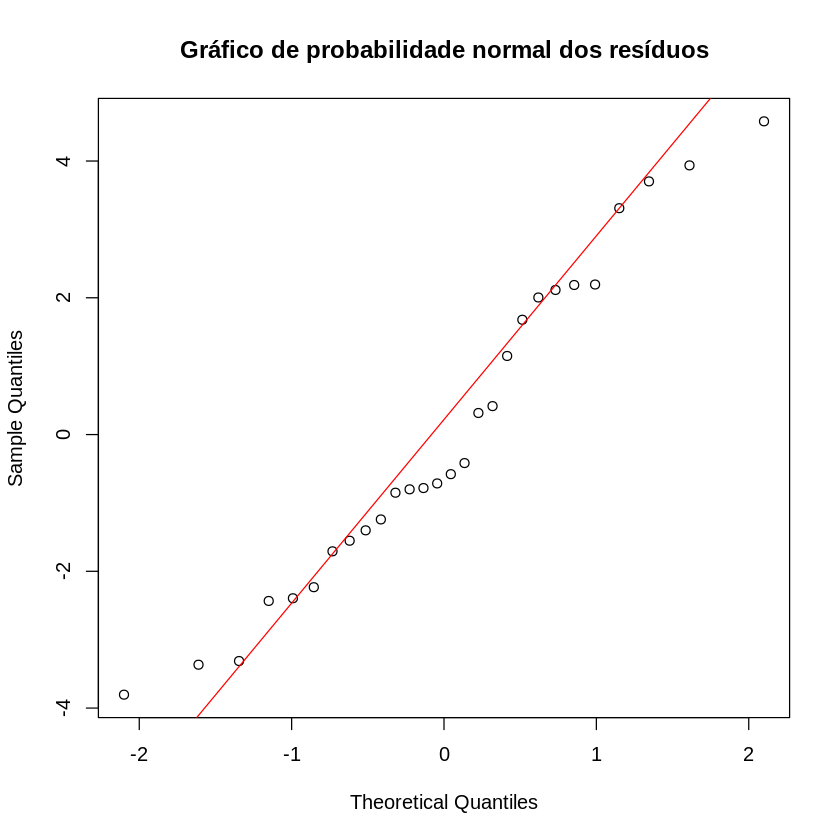

In [4]:
# Resíduos:
residuos <- residuals(modelo)

# Visualização:
qqnorm(residuos, main='Gráfico de probabilidade normal dos resíduos')
qqline(residuos, col = "red")

**Conclusão**

    A linha de referência ajuda a avaliar visualmente a normalidade
    dos resíduos. Se os resíduos seguirem uma distribuição normal,
    eles devem se alinhar aproximadamente com esta linha.

    Vemos então que há um ajuste rasoável entre os quanties reais da
    distribuição dos dados com relação ao quantil da normal teórica
    que seria, ou seja, vemos que o modelo normal é uma aproximação
    rasoável.

**b.** Construa e interprete um gráfico dos resíduos versus a resposta prevista.

In [5]:
valores_preditos <- fitted(modelo)

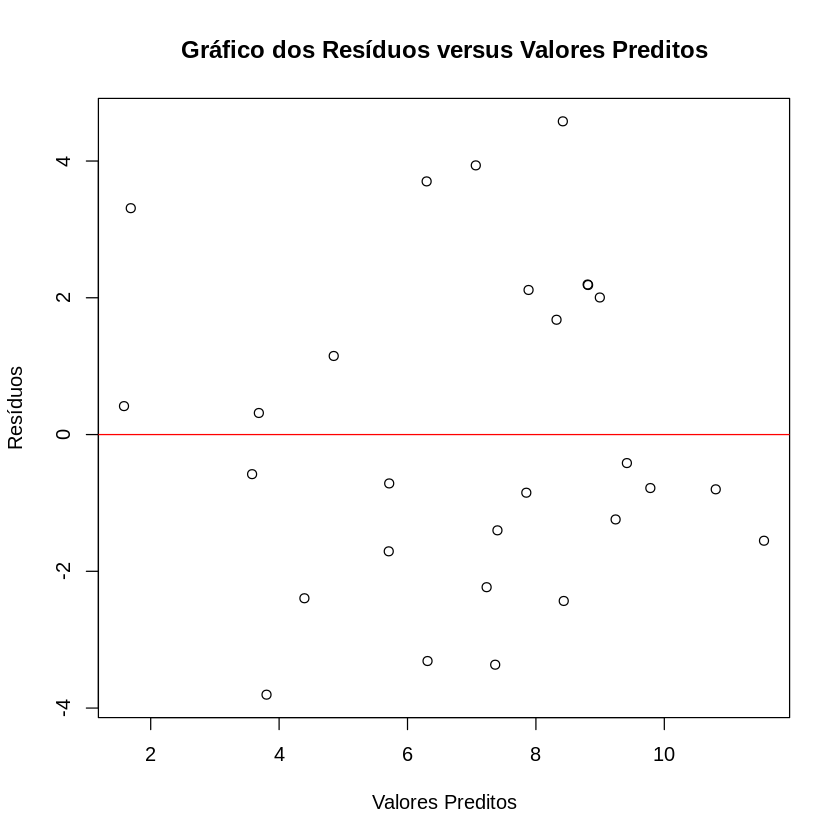

In [6]:
# Criação do gráfico dos resíduos versus os valores preditos
plot(valores_preditos, residuos,
     xlab = "Valores Preditos",
     ylab = "Resíduos",
     main = "Gráfico dos Resíduos versus Valores Preditos")
abline(h = 0, col = "red")  # Adiciona uma linha horizontal na posição zero

**c.** Trace os resíduos versus a equipe passando em jardas, x2. Este gráfico indica que o modelo será melhorado adicionando x2 ao modelo?

In [7]:
# Modelo multinomial:
modelo_multinomial <- lm(y~x8+x2);summary(modelo_multinomial)


Call:
lm(formula = y ~ x8 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4280 -1.3744 -0.0177  1.0010  4.1240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.7126750  2.6175266   5.621 7.55e-06 ***
x8          -0.0068083  0.0009658  -7.049 2.18e-07 ***
x2           0.0031111  0.0007074   4.398 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.832 on 25 degrees of freedom
Multiple R-squared:  0.7433,	Adjusted R-squared:  0.7227 
F-statistic: 36.19 on 2 and 25 DF,  p-value: 4.152e-08


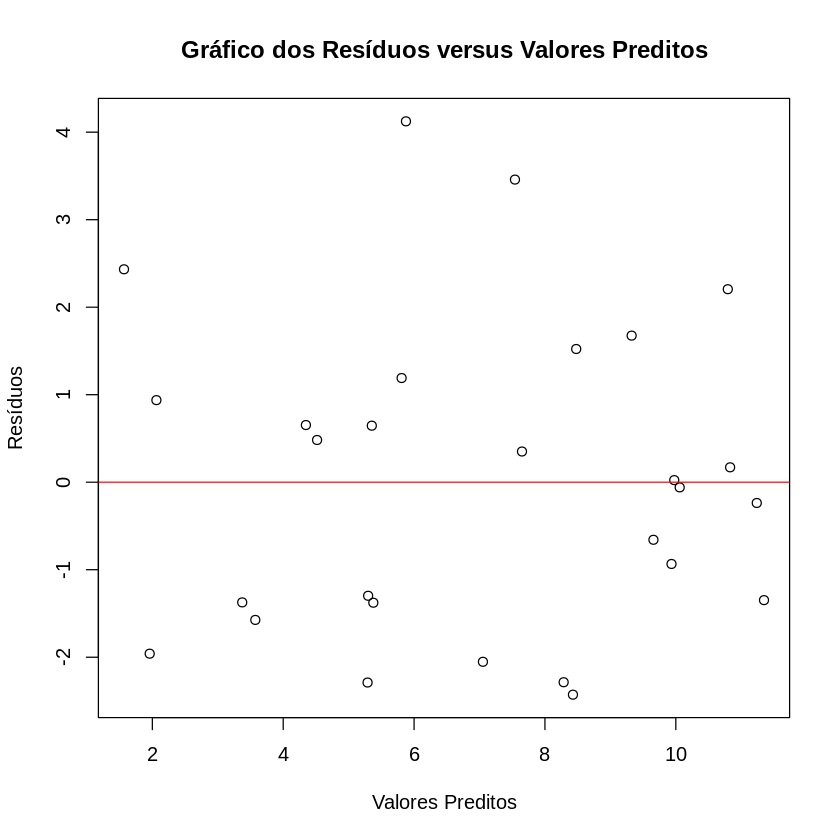

In [8]:
# Gráfico dos resíduos versus os valores preditos
plot(fitted(modelo_multinomial), residuals(modelo_multinomial),
     xlab = "Valores Preditos",
     ylab = "Resíduos",
     main = "Gráfico dos Resíduos versus Valores Preditos")
abline(h = 0, col = "red")  # Adiciona uma linha horizontal na posição zero

In [11]:
modelo <- lm(y~x8+x2);summary(modelo)


Call:
lm(formula = y ~ x8 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4280 -1.3744 -0.0177  1.0010  4.1240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.7126750  2.6175266   5.621 7.55e-06 ***
x8          -0.0068083  0.0009658  -7.049 2.18e-07 ***
x2           0.0031111  0.0007074   4.398 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.832 on 25 degrees of freedom
Multiple R-squared:  0.7433,	Adjusted R-squared:  0.7227 
F-statistic: 36.19 on 2 and 25 DF,  p-value: 4.152e-08


In [12]:
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x8,1,178.09231,178.092314,53.04269,1.245319e-07
x2,1,64.93378,64.933775,19.33976,1.775241e-04
Residuals,25,83.93820,3.357528,NA,NA


In [20]:
mean(residuals(modelo))

[1] -5.684317e-18